In [19]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

Dataset URL: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset
License(s): CC0-1.0
the-movies-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
import zipfile

import os

# Caminho do arquivo .zip
zip_file_path = 'the-movies-dataset.zip'

# Diretório onde os arquivos serão extraídos
extract_to = 'data'

# Certifique-se de que o diretório de extração exista, senão crie-o
os.makedirs(extract_to, exist_ok=True)

# Abre o arquivo .zip e extrai todos os arquivos
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Remove o arquivo .zip após a extração
os.remove(zip_file_path)

In [21]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd
import random 
df = pd.read_csv('data/ratings_small.csv')
df.head(10)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [23]:
# transformando em matriz A
import numpy as np

A = df.pivot(index='userId', columns='movieId', values='rating').fillna(0)
A

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from numpy.linalg import svd
linha = random.randint(0, A.shape[0] - 1)
coluna = random.randint(0, A.shape[1] - 1)

#matriz B 
B = A.copy()
B.iloc[linha, coluna] = random.uniform(0, 5)

#matriz B decomposta 
u, sigma, vt = svd(B, full_matrices=False)

k = 50
u_ = u[:, :k]
sigma_ = np.diag(sigma[:k])
vt_ = vt[:k, :]

# matriz aproximada
B_ = u_ @ sigma_ @ vt_
B_

array([[-5.74485124e-02,  4.41574536e-02, -3.52842966e-03, ...,
        -6.99836023e-04, -4.19901614e-04, -3.03737737e-03],
       [ 3.97099086e-01,  1.42240134e+00, -1.75769085e-01, ...,
         5.80275027e-03,  3.48165016e-03, -4.01399956e-03],
       [ 1.27539592e+00,  2.96783003e-01,  3.34082813e-02, ...,
         8.37899322e-03,  5.02739593e-03, -5.22247935e-03],
       ...,
       [ 7.00132371e-01, -1.23196942e-01,  2.05782347e-01, ...,
         4.29265450e-03,  2.57559270e-03, -5.63880944e-03],
       [ 1.57425764e+00,  8.93330060e-02, -3.76076197e-02, ...,
         1.35762221e-03,  8.14573329e-04,  2.42852162e-03],
       [ 3.59652543e+00,  2.77577598e-01, -1.17519728e-01, ...,
         5.61126404e-03,  3.36675842e-03, -1.84653008e-02]])

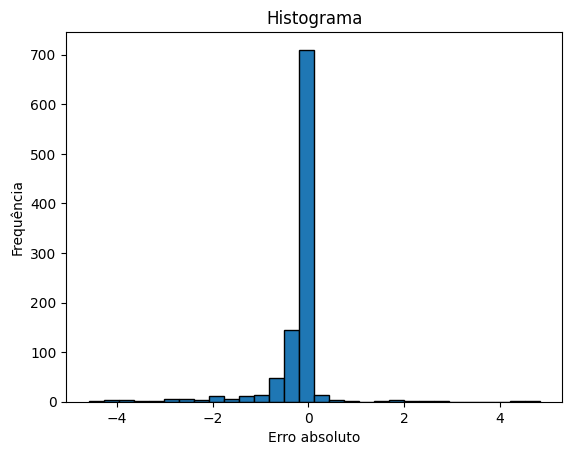

In [25]:
import matplotlib.pyplot as plt

valor_original_previsto = B_[linha, coluna]

erros = [] 
n_estimativas = 1000 

for _ in range(n_estimativas):
    linha = random.randint(0, A.shape[0] - 1)
    coluna = random.randint(0, A.shape[1] - 1)
    
    # gerando matriz b pra cada iteração
    B = A.copy()
    B.iloc[linha, coluna] = random.uniform(0, 5)

    u, sigma, vt = svd(B, full_matrices=False)
    u_ = u[:, :k]
    sigma_ = np.diag(sigma[:k])
    vt_ = vt[:k, :]

    B_ = u_ @ sigma_ @ vt_
    valor_previsto = B_[linha, coluna]

    valor_real = A.iloc[linha, coluna]
    error = valor_real - valor_previsto
    erros.append(error)

plt.hist(erros, bins=30, edgecolor='black')
plt.xlabel('Erro absoluto')
plt.ylabel('Frequência')
plt.title('Histograma')
plt.show()